# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url=f"{url}?q={city}&appid={weather_api_key}&units=Metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amozoc
City not found. Skipping...
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | kysyl-syr
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | raudeberg
Processing Record 6 of Set 1 | batagay
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | shelburne
Processing Record 13 of Set 1 | muravlenko
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | waitati
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | tiksi
Pr

Processing Record 35 of Set 4 | amalapuram
Processing Record 36 of Set 4 | anchorage
Processing Record 37 of Set 4 | umtata
Processing Record 38 of Set 4 | ancud
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | igra
Processing Record 41 of Set 4 | jiexiu
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | turayf
Processing Record 44 of Set 4 | talawdi
City not found. Skipping...
Processing Record 45 of Set 4 | kingsville
Processing Record 46 of Set 4 | garachine
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | kununurra
Processing Record 49 of Set 4 | kostyantynivka
Processing Record 0 of Set 5 | canavieiras
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | mumford
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | belmopan
Processing Record 6 of Set 5 | pokrovsk
Processing Record 7 of Set 5 | chau doc
Processing Record 8 of Set 5 | whitehors

Processing Record 27 of Set 8 | orocue
Processing Record 28 of Set 8 | rubiera
Processing Record 29 of Set 8 | nantucket
Processing Record 30 of Set 8 | urucui
Processing Record 31 of Set 8 | andenes
Processing Record 32 of Set 8 | baykit
Processing Record 33 of Set 8 | pringsewu
Processing Record 34 of Set 8 | port shepstone
Processing Record 35 of Set 8 | namioka
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | aksu
Processing Record 39 of Set 8 | marzuq
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | mergui
City not found. Skipping...
Processing Record 42 of Set 8 | rockhampton
Processing Record 43 of Set 8 | cacequi
Processing Record 44 of Set 8 | vila
Processing Record 45 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 8 | tautira
Processing Record 47 of Set 8 | vanimo
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 | manokwari
Proce

Processing Record 14 of Set 12 | alofi
Processing Record 15 of Set 12 | pachino
Processing Record 16 of Set 12 | oranjestad
Processing Record 17 of Set 12 | kutum
Processing Record 18 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 12 | constancia
Processing Record 20 of Set 12 | gouyave
Processing Record 21 of Set 12 | turtkul
City not found. Skipping...
Processing Record 22 of Set 12 | channel-port aux basques
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | toliary
City not found. Skipping...
Processing Record 25 of Set 12 | nehe
Processing Record 26 of Set 12 | los llanos de aridane
Processing Record 27 of Set 12 | pitimbu
Processing Record 28 of Set 12 | opochka
Processing Record 29 of Set 12 | yining
Processing Record 30 of Set 12 | banda aceh
Processing Record 31 of Set 12 | yaan
Processing Record 32 of Set 12 | mineiros
Processing Record 33 of Set 12 | aksha
Processing Record 34 of Set 12 | kabo
Processing Re

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", 
                          "Lat", 
                          "Lng", 
                          "Max Temp",
                          "Humidity",
                          "Cloudiness",
                          "Wind Speed",
                          "Country",
                          "Date"                                          
                                    ])

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,-21.41,57,18,3.56,GL,1699936121
1,kysyl-syr,63.8986,122.7617,-12.47,95,100,2.20,RU,1699936122
2,guerrero negro,27.9769,-114.0611,20.15,60,100,4.18,MX,1699935962
3,raudeberg,61.9875,5.1352,4.93,1,4,2.68,NO,1699936123
4,batagay,67.6333,134.6333,-21.03,90,100,2.48,RU,1699936124


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-21.41,57,18,3.56,GL,1699936121
1,kysyl-syr,63.8986,122.7617,-12.47,95,100,2.20,RU,1699936122
2,guerrero negro,27.9769,-114.0611,20.15,60,100,4.18,MX,1699935962
3,raudeberg,61.9875,5.1352,4.93,1,4,2.68,NO,1699936123
4,batagay,67.6333,134.6333,-21.03,90,100,2.48,RU,1699936124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

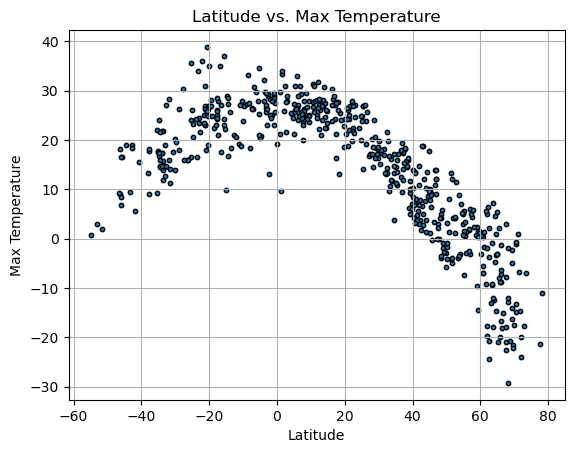

In [14]:
# Build scatter plot for latitude vs. temperature
lat=city_data_df['Lat']
temp=city_data_df['Max Temp']
plt.scatter(lat,temp,s=10,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

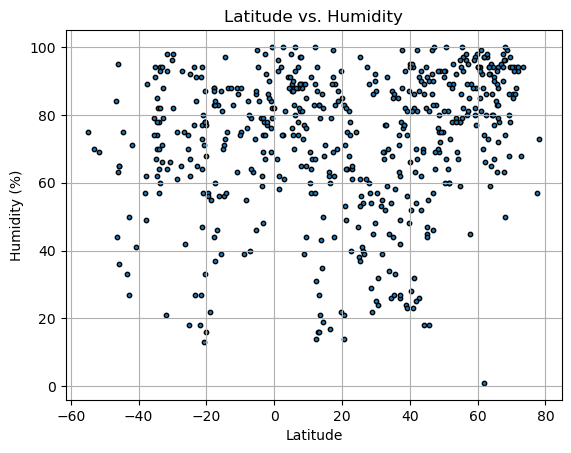

In [15]:
# Build the scatter plots for latitude vs. humidity
lat=city_data_df['Lat']
humid=city_data_df['Humidity']
plt.scatter(lat,humid,s=10,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

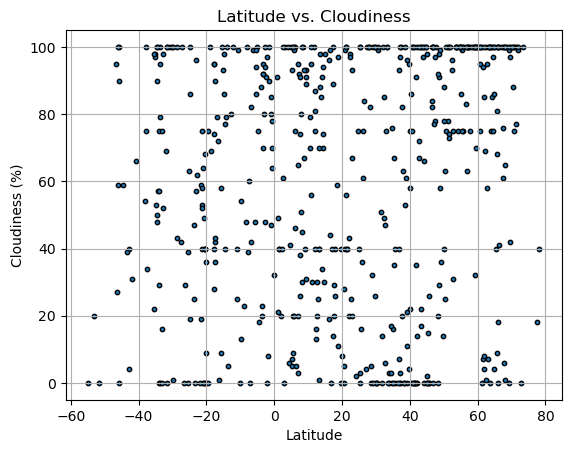

In [16]:
# Build the scatter plots for latitude vs. cloudiness
lat=city_data_df['Lat']
cloud=city_data_df['Cloudiness']
plt.scatter(lat,cloud,s=10,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid(visible=True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

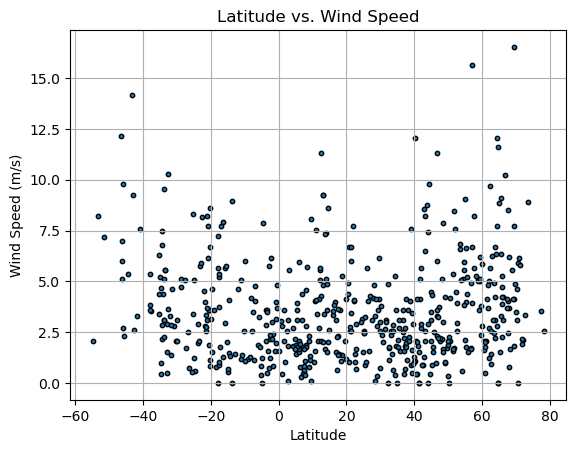

In [17]:
# Build the scatter plots for latitude vs. wind speed
lat=city_data_df['Lat']
wind=city_data_df['Wind Speed']
plt.scatter(lat,wind,s=10,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
import scipy.stats as st

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-21.41,57,18,3.56,GL,1699936121
1,kysyl-syr,63.8986,122.7617,-12.47,95,100,2.20,RU,1699936122
2,guerrero negro,27.9769,-114.0611,20.15,60,100,4.18,MX,1699935962
3,raudeberg,61.9875,5.1352,4.93,1,4,2.68,NO,1699936123
4,batagay,67.6333,134.6333,-21.03,90,100,2.48,RU,1699936124


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,punta arenas,-53.1500,-70.9167,3.06,70,20,8.23,CL,1699936125
6,mahebourg,-20.4081,57.7000,26.81,78,40,3.60,MU,1699936125
7,castro,-24.7911,-50.0119,20.61,67,19,0.58,BR,1699936126
8,saint-philippe,-21.3585,55.7679,26.77,77,53,3.33,RE,1699936126
13,bengkulu,-3.8004,102.2655,27.87,79,88,2.86,ID,1699936059


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.2254542312907188


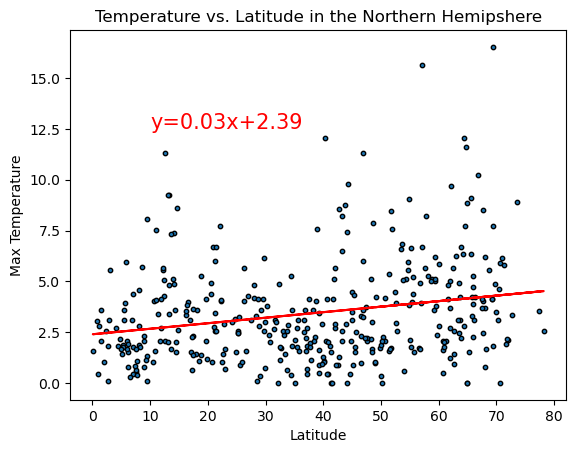

In [21]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Temperature vs. Latitude in the Northern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

The r-value is: -0.354531814404319


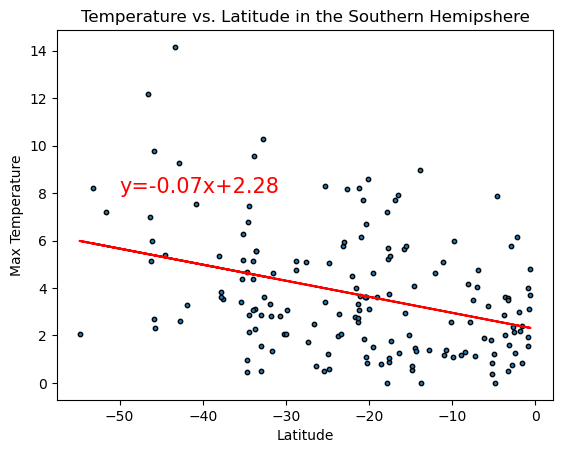

In [22]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Temperature vs. Latitude in the Southern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere, there is a positive relationship between latitude and max temperature. As latitude increases, so does temperature. This relationship is very weak. The southern hemisphere has the opposite relationship - as latitude increases, temperature decreases. This is a weak relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22445045567384828


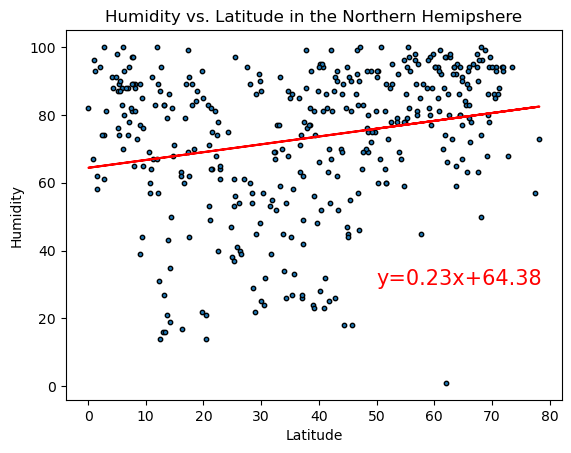

In [23]:
# Northern Hemisphere
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in the Northern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

The r-value is: 0.14349312587542748


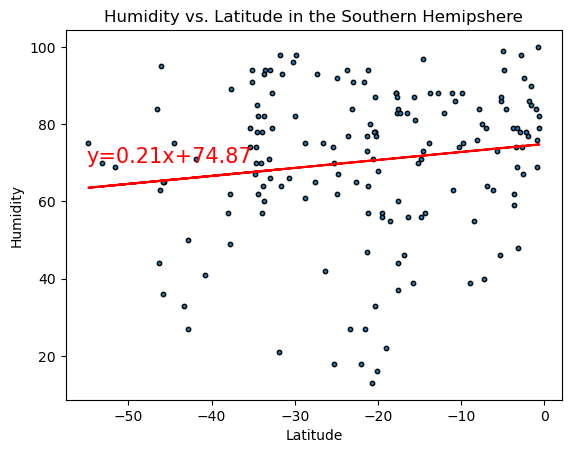

In [24]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in the Southern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Both the northern and southern hemispheres have a positive relationship between latitude and humidity. As the latitude increases, so too does the humidity. Both of these are very weak relationships.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20902556200762873


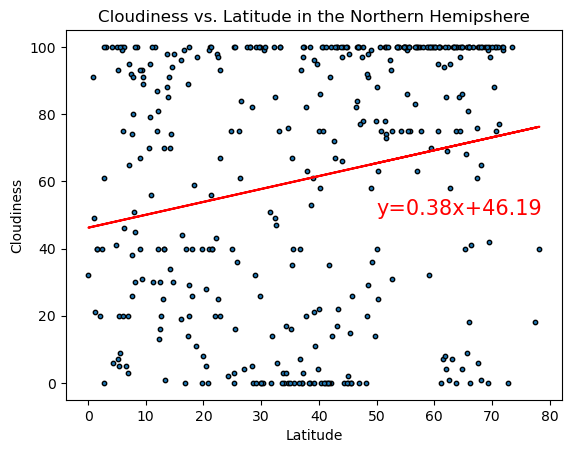

In [25]:
# Northern Hemisphere
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude in the Northern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

The r-value is: 0.12636109410862084


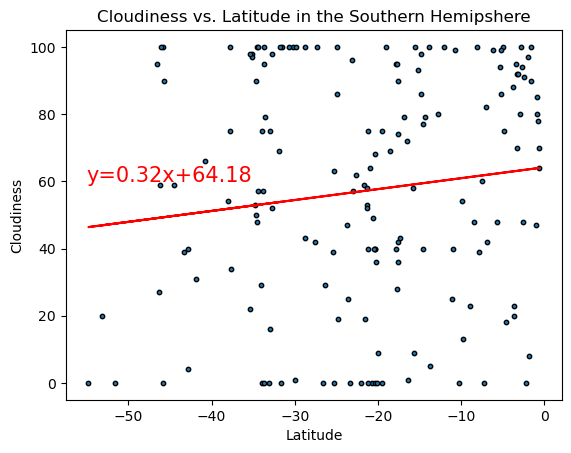

In [26]:
# Southern Hemisphere
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude in the Southern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Both the northern and southern hemispheres have a positive relationship between latitude and cloudiness. As the latitude increases, so too does the cloudiness. Both of these are very weak relationships.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2254542312907188


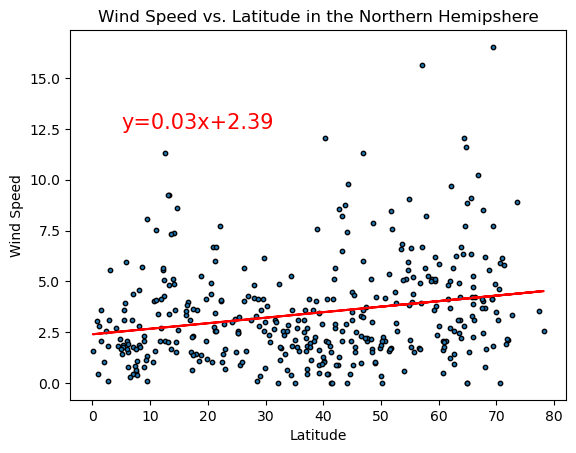

In [27]:
# Northern Hemisphere
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,12.5),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude in the Northern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

The r-value is: -0.354531814404319


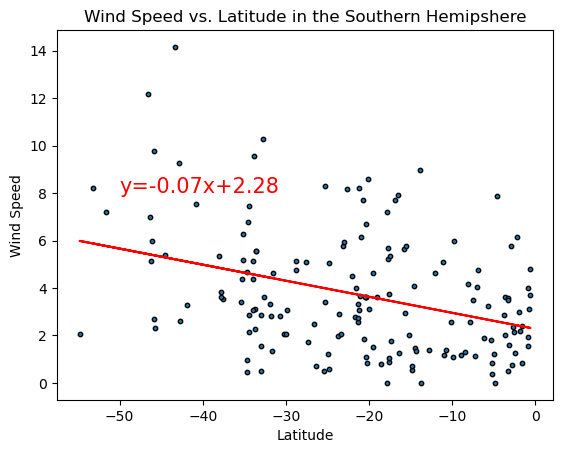

In [28]:
# Southern Hemisphere
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']

(slope, intercept, revalue, pvalue, stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x,y,s=10,edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude in the Southern Hemipshere")

corr=np.corrcoef(x,y)
r_value=corr[0,1]
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere, there is a positive relationship between latitude and wind speed. As latitude increases, so does wind speed. This relationship is very weak. The southern hemisphere has a negative relationshipo between latitude and wind speed. As the latitude increases, the windspeed decreases. This is a weak relationship.